### Implement All the Required Libraries

In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score

### Upload Dataset

In [125]:
data = pd.read_csv('/mental-illnesses-prevalence.csv')
data.head()

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815


### Rename Dataset

In [126]:
data = data.rename(columns={'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': 'Schizophrenia disorders'})
data = data.rename(columns={'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depressive disorders'})
data = data.rename(columns={'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized': 'Anxiety disorders'})
data = data.rename(columns={'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized': 'Bipolar disorders'})
data = data.rename(columns={'Eating disorders (share of population) - Sex: Both - Age: Age-standardized': 'Eating disorders'})

In [127]:
data.head()

,Entity,Code,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815


In [128]:
data.columns

Index(['Entity', 'Code', 'Year', 'Schizophrenia disorders',
       'Depressive disorders', 'Anxiety disorders', 'Bipolar disorders',
       'Eating disorders'],
      dtype='object')

In [129]:
data.dtypes

Entity                      object
Code                        object
Year                         int64
Schizophrenia disorders    float64
Depressive disorders       float64
Anxiety disorders          float64
Bipolar disorders          float64
Eating disorders           float64
dtype: object

### Finding Missing Values

In [130]:
data.isnull().sum()

Entity                       0
Code                       270
Year                         0
Schizophrenia disorders      0
Depressive disorders         0
Anxiety disorders            0
Bipolar disorders            0
Eating disorders             0
dtype: int64

In [131]:
data = data.dropna()

In [132]:
data.isnull().sum()

Entity                     0
Code                       0
Year                       0
Schizophrenia disorders    0
Depressive disorders       0
Anxiety disorders          0
Bipolar disorders          0
Eating disorders           0
dtype: int64

In [133]:
data.shape

(6150, 8)

### Correlation Coefficient

In [134]:
# Assuming 'Entity Code' is the column with string values
data_numeric = data.select_dtypes(include=['number'])  # Select only numeric columns
correlation_matrix = data_numeric.corr()
correlation_matrix

,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
Year,1.000000,0.025681,-0.048366,0.028779,0.002705,0.075643
Schizophrenia disorders,0.025681,1.000000,-0.472859,0.294208,0.117661,0.495563
Depressive disorders,-0.048366,-0.472859,1.000000,0.120388,0.154509,-0.046099
Anxiety disorders,0.028779,0.294208,0.120388,1.000000,0.569075,0.586784
Bipolar disorders,0.002705,0.117661,0.154509,0.569075,1.000000,0.674967
Eating disorders,0.075643,0.495563,-0.046099,0.586784,0.674967,1.000000


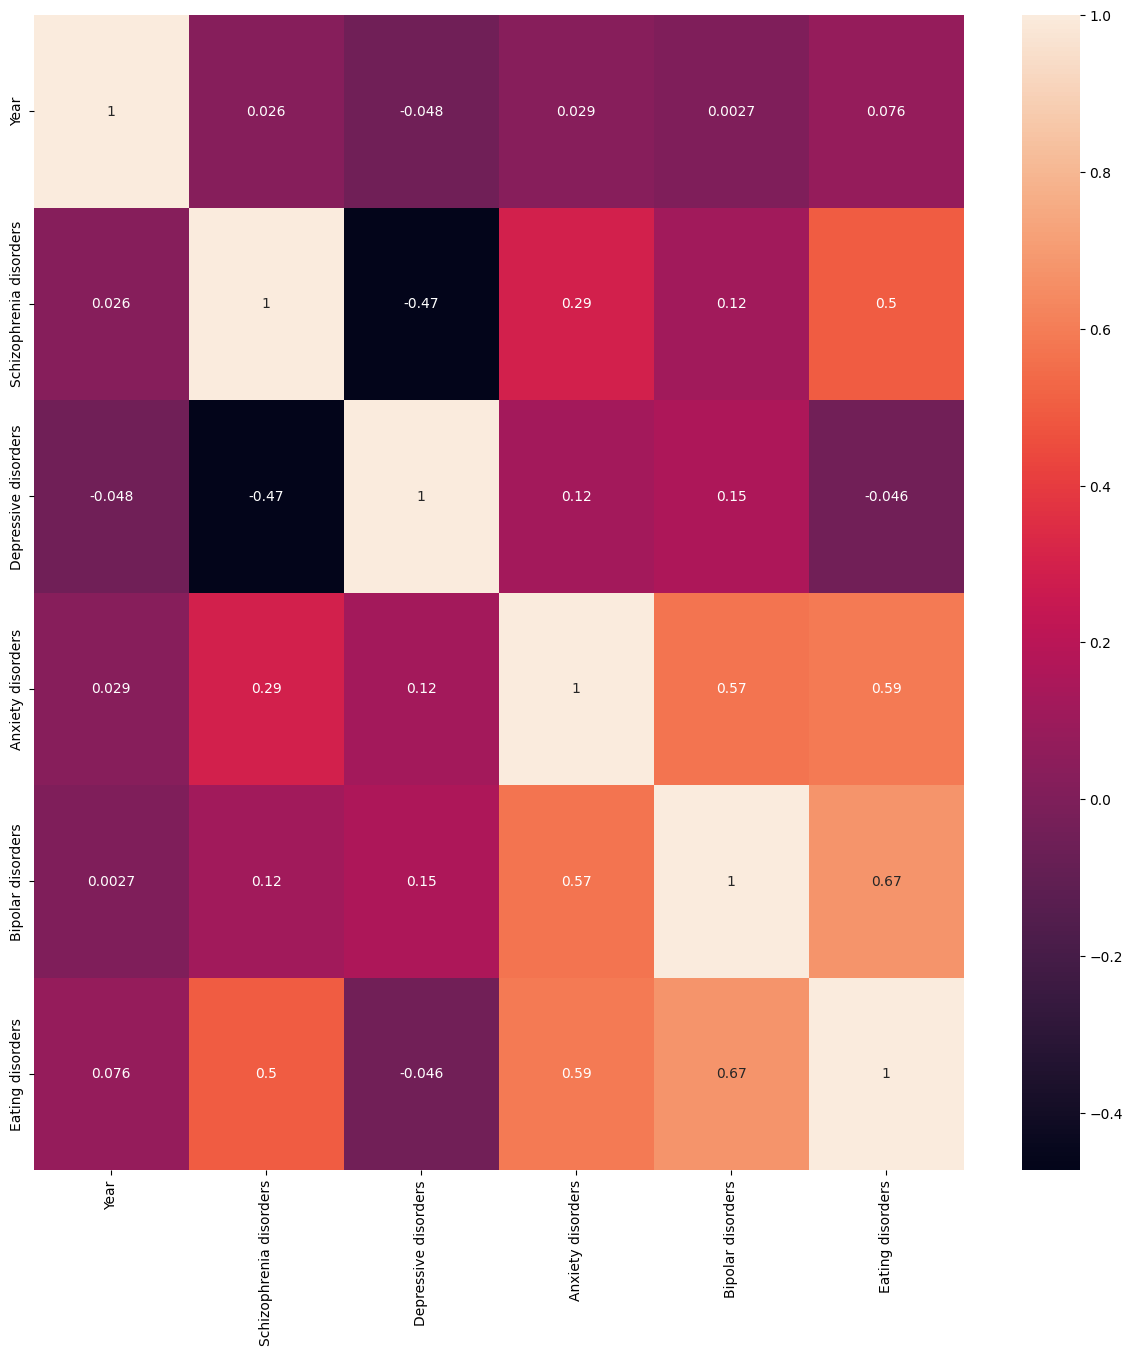

In [135]:
# Select only numeric columns for correlation analysis
data_numeric = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = data_numeric.corr()

plt.figure(figsize=(15,15))
ax = sns.heatmap(correlation_matrix, annot=True)  # Use correlation_matrix here
plt.savefig('correlation-coefficient.jpg')
plt.show()

### Descriptive Staistics of the given data

In [136]:
data.describe()

,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
count,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000,6150.000000
mean,2004.500000,0.266031,3.766168,4.098702,0.638366,0.194945
std,8.656145,0.039258,0.939617,1.060642,0.235506,0.139051
min,1990.000000,0.188416,1.522333,1.879996,0.181667,0.044780
25%,1997.000000,0.241982,3.063132,3.425237,0.521153,0.095748
50%,2004.500000,0.272983,3.642872,3.939547,0.579017,0.144325
75%,2012.000000,0.285912,4.369088,4.539975,0.853304,0.242860
max,2019.000000,0.462045,7.645899,8.624634,1.506730,1.031688


### Data Imputation

<ipython-input-137-a6c65a99e232>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Schizophrenia disorders'])


<Axes: xlabel='Schizophrenia disorders', ylabel='Density'>

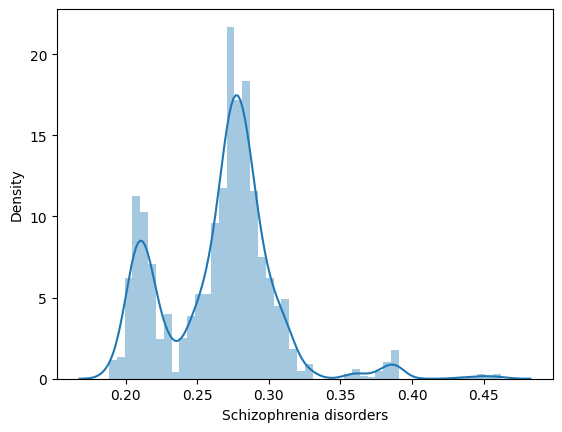

In [137]:
sns.distplot(data['Schizophrenia disorders'])

<ipython-input-138-1c8db856856e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Depressive disorders'])


<Axes: xlabel='Depressive disorders', ylabel='Density'>

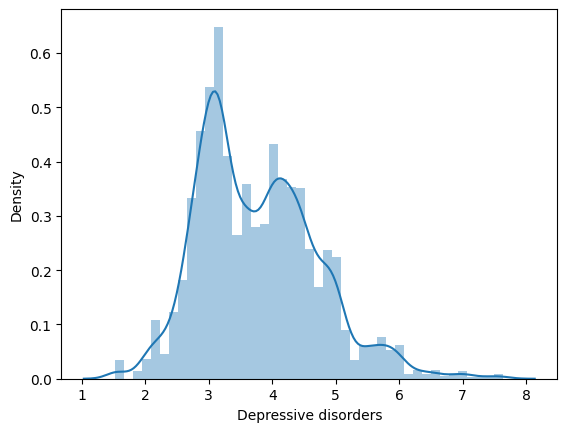

In [138]:
sns.distplot(data['Depressive disorders'])

<ipython-input-139-47968fcd26c5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Anxiety disorders'])


<Axes: xlabel='Anxiety disorders', ylabel='Density'>

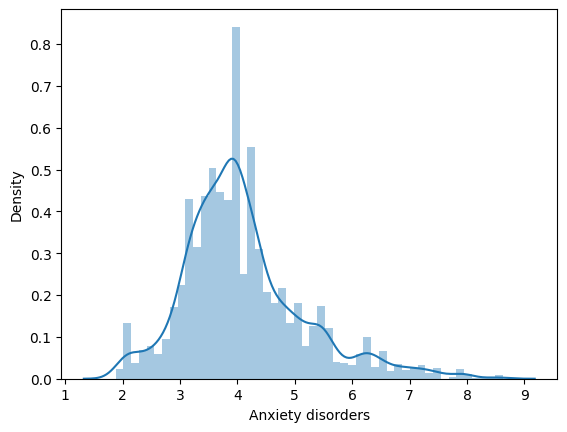

In [139]:
sns.distplot(data['Anxiety disorders'])

<ipython-input-140-354518b3e652>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Bipolar disorders'])


<Axes: xlabel='Bipolar disorders', ylabel='Density'>

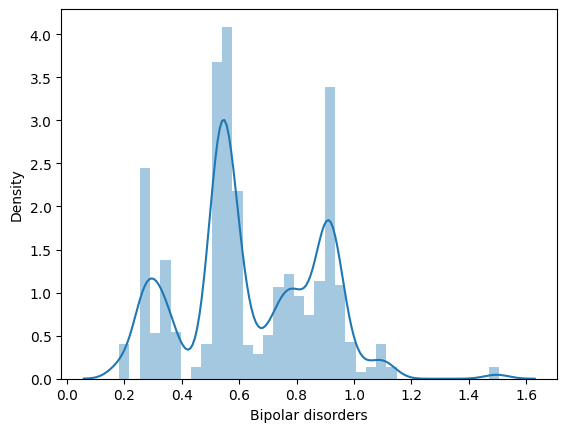

In [140]:
sns.distplot(data['Bipolar disorders'])

<ipython-input-141-71c51b4dee47>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Eating disorders'])


<Axes: xlabel='Eating disorders', ylabel='Density'>

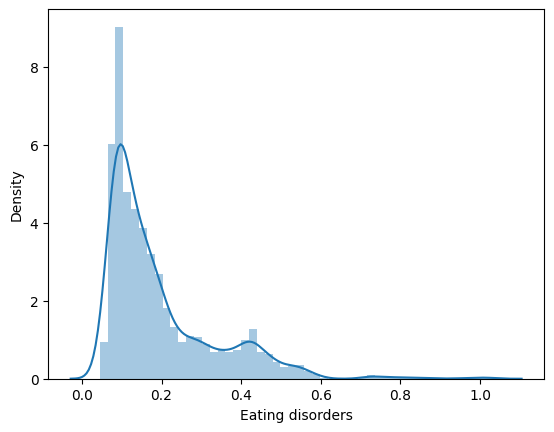

In [141]:
sns.distplot(data['Eating disorders'])

### Outlier Detection -> Quantile method

In [142]:
# Convert relevant columns to numeric type
for col in data.columns:
    if data[col].dtype == 'object':  # Check if column is of object (string) type
        try:
            data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to numeric, replace non-convertible values with NaN
        except:
            print(f"Could not convert column {col} to numeric")

# Calculate quantiles
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((data < lower_bound) | (data > upper_bound)).any(axis=1)

# Print outliers
data[outliers]

# Drop outliers
data = data[~outliers]

In [143]:
data.shape

(5440, 8)

### Model Training

In [144]:
from sklearn.impute import SimpleImputer

# Assuming 'Schizophrenia disorders' is the target variable and the rest are features
X = data.drop('Schizophrenia disorders', axis=1)
y = data['Schizophrenia disorders']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an imputer to fill missing values (e.g., with the mean)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Entity' 'Code']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Entity' 'Code']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [145]:
X_train.shape , X_test.shape

((3808, 5), (1632, 5))

### perturbation is applied

In [146]:
# Add random noise to the features
def add_noise(data, noise_level=0.1):
    noise = noise_level * np.random.randn(*data.shape)
    return data + noise

# Apply perturbation to the dataset
X_noisy = add_noise(X)

In [147]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [148]:
print("Accuracy :", rf.score(X_test, y_test))

Accuracy : 0.9972390538405603


In [149]:
y_predict_rf = rf.predict(X_test)
print(y_predict_rf)

[0.21316908 0.20820848 0.27027555 ... 0.24621435 0.25960894 0.21315869]


In [150]:
from sklearn.metrics import mean_squared_error, r2_score # Import metrics for regression

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_predict_rf)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_predict_rf)
print("R-squared:", r2)

Mean Squared Error: 3.0436960038812126e-06
R-squared: 0.9972390538405603


### With out Perturbation(Noise Less)

In [151]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [158]:
# For comparison, train on the original data without noise
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_orig = scaler.fit_transform(X_train_orig)
X_test_orig = scaler.transform(X_test_orig)
rf.fit(X_train, y_train)
y_pred_orig = rf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [159]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred_orig)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.085903387355962e-06


In [160]:
# Calculate R-squared for the original data (assuming a regression problem)
r2_orig = r2_score(y_test, y_pred_orig)
print(f'R-squared without noise: {r2_orig:.2f}')

R-squared without noise: 1.00
